In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1 - Introduction to Matplotlib

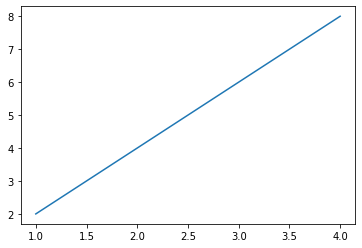

In [2]:
x = [1,2,3,4]
y = [nilai*2 for nilai in x]

plt.plot(x,y)
plt.show()

### 2 - Plotting time-series

### 3 - Quantitative comparisons and statistical visualizations

### 4 - Sharing visualizations with others